### Gmarket
- 베스트 상품 200개 데이터 수집
- 상품의 이미지 200개 다운로드

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

#### 1. URL 찾기

In [2]:
url = 'https://corners.gmarket.co.kr/bestsellers'

#### 2. request > response : str(html)

In [3]:
response = requests.get(url)
response

<Response [200]>

#### 3. bs > DataFrame

In [4]:
dom = BeautifulSoup(response.text, 'html.parser')

In [5]:
elements = dom.select('#gBestWrap > div > div:nth-child(5) > div > ul > li')
len(elements)

200

In [6]:
element = elements[0]

In [7]:
data = {
    'title' : element.select_one('.itemname').text,
    'link' : element.select_one('.itemname').get('href'), 
    'img' : 'http:' + element.select_one('img').get('data-original'), 
    'o_price' : element.select_one('.o-price').text, 
    's_price' : element.select_one('.s-price').text.strip().split('\n')[0], 
}
data

{'title': '(지오지아)사계절 테이퍼드/와이드핏 슬랙스  치노팬츠 10종 택1',
 'link': 'http://item.gmarket.co.kr/Item?goodscode=2767818438&ver=638122455229715968',
 'img': 'http://gdimg.gmarket.co.kr/2767818438/still/300?ver=2023021715',
 'o_price': '정가32,000원',
 's_price': '할인가24,640원'}

In [8]:
data = []
for element in elements:
    data.append({
    'title' : element.select_one('.itemname').text,
    'link' : element.select_one('.itemname').get('href'), 
    'img' : 'http:' + element.select_one('img').get('data-original'), 
    'o_price' : element.select_one('.o-price').text, 
    's_price' : element.select_one('.s-price').text.strip().split('\n')[0], 
    })
    
df = pd.DataFrame(data)
df.tail(2)

,title,link,img,o_price,s_price
198,[Miel]미엘 클래식 물티슈 100매 캡형 20팩 우체국택배 빠른배송,http://item.gmarket.co.kr/Item?goodscode=14645...,http://gdimg.gmarket.co.kr/1464502915/still/30...,,"할인가24,900원"
199,무료배송 페이퍼맥스 고양이 종이컵 2000개/1박스,http://item.gmarket.co.kr/Item?goodscode=18867...,http://gdimg.gmarket.co.kr/1886792777/still/30...,"정가21,190원","할인가19,920원"


In [9]:
# update : 데이터선택 = 수정할데이터

idx = df[df['o_price'] == ''].index
df['o_price'].loc[idx] = df['s_price'].loc[idx]
df[20:40].head(2)

,title,link,img,o_price,s_price
20,[엔비에이](현대백화점)[NBA] 남여공용 맨투맨 후드티셔츠 후리스점퍼 5종택1 (...,http://item.gmarket.co.kr/Item?goodscode=27790...,http://gdimg.gmarket.co.kr/2779014323/still/30...,"정가29,000원","할인가25,230원"
21,[도루코]베이직 파스텔 주방가위 1+1특가(색상랜덤) + 집게증정 /우수한절삭력,http://item.gmarket.co.kr/Item?goodscode=21508...,http://gdimg.gmarket.co.kr/2150845686/still/30...,"할인가7,900원","할인가7,900원"


In [10]:
# regex : 정규표현식
# 문자열 데이터를 특정 패턴으로 처리할 때 사용하는 문법

In [11]:
import re
price = '할인가11,800원'
re.findall('[0-9,]+', price)[0]

'11,800'

In [12]:
df['o_price'] = df['o_price'].apply(lambda price: re.findall('[0-9,]+', price)[0])
df['s_price'] = df['s_price'].apply(lambda price: re.findall('[0-9,]+', price)[0])
df.tail(2)

,title,link,img,o_price,s_price
198,[Miel]미엘 클래식 물티슈 100매 캡형 20팩 우체국택배 빠른배송,http://item.gmarket.co.kr/Item?goodscode=14645...,http://gdimg.gmarket.co.kr/1464502915/still/30...,"24,900","24,900"
199,무료배송 페이퍼맥스 고양이 종이컵 2000개/1박스,http://item.gmarket.co.kr/Item?goodscode=18867...,http://gdimg.gmarket.co.kr/1886792777/still/30...,"21,190","19,920"


In [13]:
txt = '저의 이메일 주소는 aaaa@gmail.com과 sda.sdf@naver.com입니다.'
re.findall('[a-zA-Z0-9]+@[a-z]+\.[a-z]+', txt)

['aaaa@gmail.com', 'sdf@naver.com']

#### 4. download image

In [ ]:
# 이미지 파일 저장할 디렉토리

In [17]:
import os
dir_name = 'data'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

In [20]:
img_link = df.loc[0, 'img']
print(img_link)

http://gdimg.gmarket.co.kr/2767818438/still/300?ver=2023021715


In [21]:
response = requests.get(img_link)
response

<Response [200]>

In [24]:
with open('data/test.png', 'wb') as file:
    file.write(response.content)

In [25]:
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 54BB-5177

 C:\Users\User\workspace\temp_space\2023.02.16_웹크롤링_실습자료\day2\data 디렉터리

2023-02-17  오후 03:52    <DIR>          .
2023-02-17  오후 03:52    <DIR>          ..
2023-02-17  오후 03:52            29,089 test.png
               1개 파일              29,089 바이트
               2개 디렉터리  137,231,446,016 바이트 남음


In [26]:
# pillow : 파이썬에서 이미지처리를 하는 패키지
from PIL import Image as pil

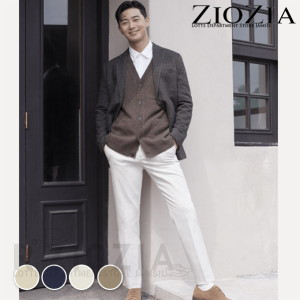

In [28]:
pil.open('data/test.png')

In [46]:
for idx, data in df[:20].iterrows():
    name = '0' * (3 - len(str(idx))) + str(idx)
    filename = f'data/{name}.png'
    print(idx, data['img'], filename)
    response = requests.get(data['img'])
    with open(filename, 'wb') as file:
        file.write(response.content)

0 http://gdimg.gmarket.co.kr/2767818438/still/300?ver=2023021715 data/000.png
1 http://gdimg.gmarket.co.kr/1998535842/still/300?ver=2023021715 data/001.png
2 http://gdimg.gmarket.co.kr/2772877848/still/300?ver=2023021715 data/002.png
3 http://gdimg.gmarket.co.kr/2503773673/still/300?ver=2023021715 data/003.png
4 http://gdimg.gmarket.co.kr/2628342593/still/300?ver=2023021715 data/004.png
5 http://gdimg.gmarket.co.kr/2284869501/still/300?ver=2023021715 data/005.png
6 http://gdimg.gmarket.co.kr/182821824/still/300?ver=2023021715 data/006.png
7 http://gdimg.gmarket.co.kr/2762345389/still/300?ver=2023021715 data/007.png
8 http://gdimg.gmarket.co.kr/2522397793/still/300?ver=2023021715 data/008.png
9 http://gdimg.gmarket.co.kr/2090522905/still/300?ver=2023021715 data/009.png
10 http://gdimg.gmarket.co.kr/2347262038/still/300?ver=2023021715 data/010.png
11 http://gdimg.gmarket.co.kr/2783962544/still/300?ver=2023021715 data/011.png
12 http://gdimg.gmarket.co.kr/2635078880/still/300?ver=20230217

In [47]:
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 54BB-5177

 C:\Users\User\workspace\temp_space\2023.02.16_웹크롤링_실습자료\day2\data 디렉터리

2023-02-17  오후 04:03    <DIR>          .
2023-02-17  오후 04:03    <DIR>          ..
2023-02-17  오후 04:03            29,089 000.png
2023-02-17  오후 04:03            20,310 001.png
2023-02-17  오후 04:03            10,109 002.png
2023-02-17  오후 04:03            30,863 003.png
2023-02-17  오후 04:03            33,866 004.png
2023-02-17  오후 04:03            32,096 005.png
2023-02-17  오후 04:03            26,815 006.png
2023-02-17  오후 04:03             6,896 007.png
2023-02-17  오후 04:03            16,533 008.png
2023-02-17  오후 04:03            24,620 009.png
2023-02-17  오후 04:03             7,638 010.png
2023-02-17  오후 04:03            76,806 011.png
2023-02-17  오후 04:03            15,319 012.png
2023-02-17  오후 04:03            63,785 013.png
2023-02-17  오후 04:03            21,315 014.png
2023-02-17  오후 04:03             6,248 015.png
2023-02-17  오후 04:03             5,481 016.png

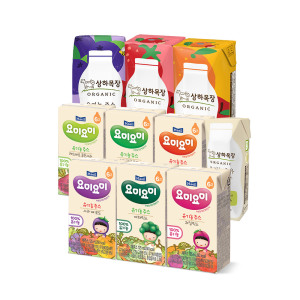

In [36]:
pil.open('data/4.png')

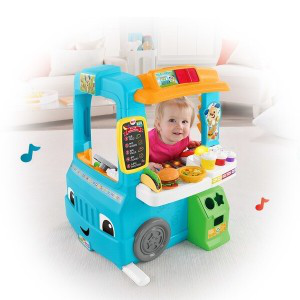

In [37]:
pil.open('data/1.png')

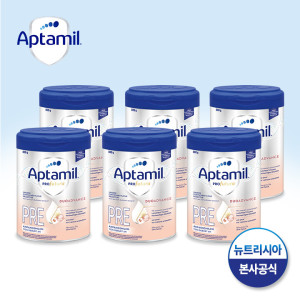

In [38]:
pil.open('data/3.png')